# Machine learning practice using the Titanic dataset

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
pwd


'/kaggle/working'

In [3]:
#cd /kaggle/input/

In [4]:
ls

__notebook__.ipynb


In [5]:
cd titanic

[Errno 2] No such file or directory: 'titanic'
/kaggle/working


In [6]:
ls

__notebook__.ipynb


In [7]:
dir_input = '/kaggle/input/titanic/'

#gender_submission.csv  test.csv  train.csv

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. .csv 파일을 데이터프레임으로 로드하기

In [3]:
import pandas as pd
#dir_input = '/kaggle/input/titanic/' 

#train = pd.read_csv(dir_input+'train.csv')
#train = pd.read_csv('../input/titanic/train.csv')


train = pd.read_csv('titanic.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 2. 데이터 전처리

    1>데이터 살펴보기
    
    2>데이터 셋에 결측치가 있는지 확인하기
    

In [10]:
#데이터 살펴보기
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
 #학습 데이터 셋의 각 필드 데이터 분포(평균, 최소값, 최대값 등)를 살펴보기
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
#각 컬럼의 데이터 타입 확인하기
print(train.shape)
train.info()
train.dtypes

(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [13]:
#'Cabin', 'Embarked'필드에는 어떤 값이 있는지 확인하기
train['Cabin'].unique()
#train['Cabin'].nunique()  갯수 147

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [14]:
train['Embarked'].unique()
#train['Embarked'].nunique() 3개

array(['S', 'C', 'Q', nan], dtype=object)

In [15]:
#생존한 사람, 사망한 사람의 수 확인하기
survival= train["Survived"].sum()#생존한 사람의 수
nsurvival = train.shape[0] - survival #사망한 사람의 수
print(f"생존자 수:{survival}, 사망자 수:{nsurvival}")

생존자 수:342, 사망자 수:549


In [16]:
#각 클래스('Pclass')별 탑승객 분포 확인하기
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [17]:
#성('Sex')별 탑승객 분표 확인하기
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [18]:
#데이터 셋에 결측치가 있는지 확인하기
train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
#'Embarked' 필드의 결측치는 값이 가장 많은 'S'로 할당하기
#Embarked :가장많은 값 구하기
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [20]:
#'Embarked' 필드의 결측치는 값이 가장 많은 'S'로 할당하기
train["Embarked"] = train["Embarked"].fillna('S')

In [21]:
#'Age' 필드의 결측치는 값이 중간값으로 할당하기
min= train["Age"].median()
train["Age"] = train["Age"].fillna(min)

train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [22]:
# 'Name'필드에서 신분을 나타내는 단어를 뽑아서 'Title' 필드에 할당하기     .
train['Title'] = train['Name'].str.extract('([A-Za-z]+)\.', expand=False)  #extract()메소드에 인자값으로 정규식을 전달해주면 해당되는 문자열을 추출
train['Title'] 

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object

In [23]:
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [24]:
#'Title' 필드의 카테고리를 6개의 항목으로 변경하기 :(['Mr', 'Mrs', 'Miss', 'Master', 'Royalty', 'Officer', 'Countess']
train['Title'] = train['Title'].replace(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer')
train['Title'] = train['Title'].replace(['Jonkheer', 'Master'], 'Master')
train['Title'] = train['Title'].replace(['Don', 'Sir', 'the Countess', 'Lady', 'Dona'], 'Royalty')
train['Title'] = train['Title'].replace(['Mme', 'Ms', 'Mrs'], 'Mrs')
train['Title'] = train['Title'].replace(['Mlle', 'Miss'], 'Miss')
train['Title'] = train['Title'].replace(['Mr'], 'Mr')
train['Title'] .unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Royalty', 'Officer', 'Countess'],
      dtype=object)

In [25]:
# 변수 y를 선언해서 학습할 목표변수(=종속변수)인 'Survived'필드값을 담기
y=train.Survived

In [26]:
#나이('Age') 필드를 그룹핑하여 'AgeGroup'필드 생성하여 할당하기  ['Baby(-18)', 'Youth(19-25)', 'YoungAdult(26-35)', 'MiddleAged(36-60)', 'Senior(61-100)']
bin = [0, 18, 25, 35, 60, 100]
group_names = ['Baby', 'Youth', 'YoungAdult', 'MiddleAged', 'Senior']
train['AgeGroup'] = pd.cut(train['Age'], bins=bin, labels=group_names) #AgeGroup컬럼의 값들을 bin에 맞게 잘라서 각 bin을 group_names와 1대1 매칭시켜 분류한다.

n=train['AgeGroup'].value_counts()
n


YoungAdult    373
MiddleAged    195
Youth         162
Baby          139
Senior         22
Name: AgeGroup, dtype: int64

## 3. 데이터 시각화 

In [ ]:
#필요한 라이브러리 Import
import matplotlib.pyplot as plt
import seaborn as sns

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


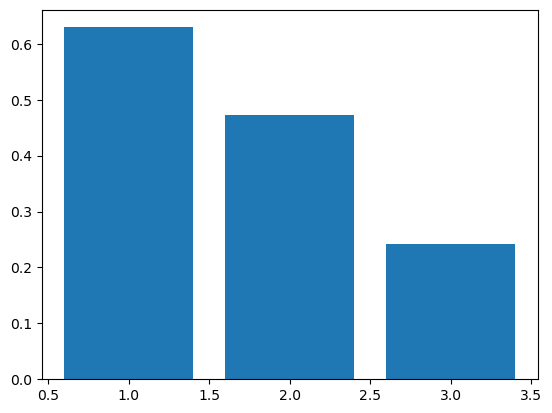

In [17]:
#각 PClass에서 몇명이나 생존했는 지 통계를 내어보자 :
s=train.groupby('Pclass')['Survived'].value_counts()
# print(s)
      
survival_counts =train.groupby('Pclass')['Survived'].sum()
#print(survival_counts)
total_passengers = train.groupby('Pclass')['Survived'].count()
#print(total_passengers)
survival_rate =survival_counts/total_passengers
print(survival_rate)

#Pclass’에  따른생존율을 집계하여 막대 그래프를 그리자
plt.bar(survival_rate.index, survival_rate.values)

plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.xticks([1,2,3])
plt.title('Survival Rate by Pclass')
plt.show()



#sns.barplot(x='Pclass', y='Survived', data=train)  같다

<Axes: xlabel='Pclass', ylabel='Survived'>

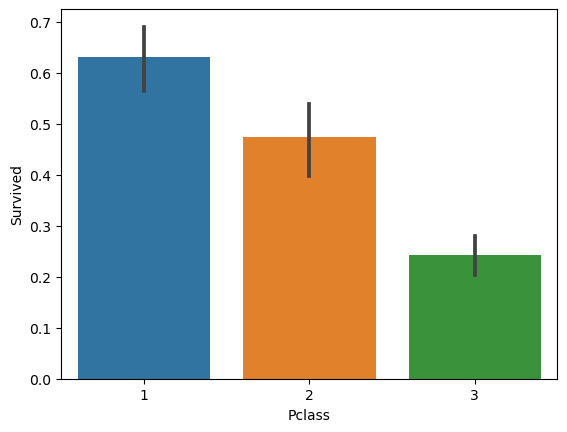

In [18]:

sns.barplot(x='Pclass', y='Survived', data=train)


<Axes: xlabel='Pclass', ylabel='Survived'>

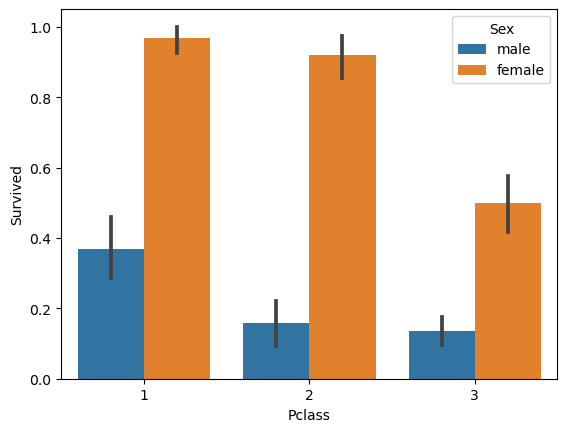

In [30]:
#학습 데이터셋(train)의 데이터 분포확인하기 ; barplot   #hist() 사용!!

sns.barplot(x='Pclass', y='Survived', hue='Sex', data=train)

Text(0.5, 1.0, 'Age')

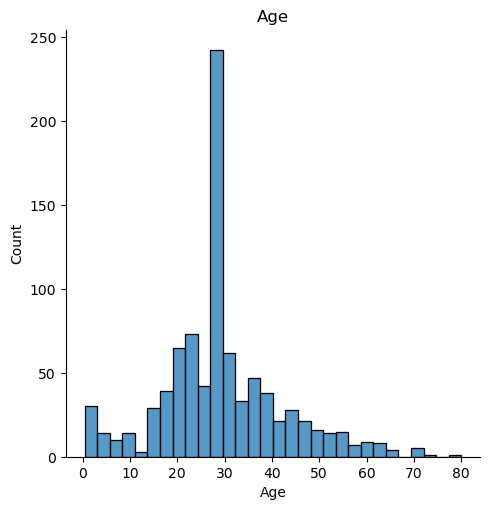

In [31]:
# hist() 메소를 호출하여 train데이터의 각 컬럼에 대한 분포를 확인한다.
#plt.hist(train["Age"],bins=20)
#sns.histplot(train,x='Age')
sns.displot(train,x='Age',kind='hist')
plt.title("Age")

In [32]:
# #모든 컬럼
# columns = train.columns

# # Create histograms for each column
# for column in columns:
#     sns.histplot(data=train, x=column)
#     plt.title(f'Histogram of {column}')
#     plt.show()

In [33]:
#sns.pairplot(data=train, kind='hist')


<Axes: xlabel='Sex', ylabel='Survived'>

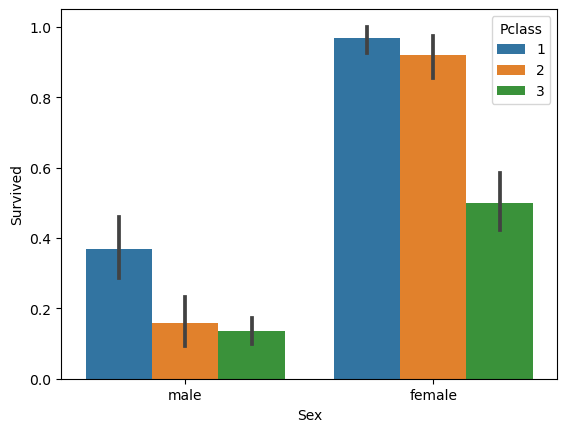

In [34]:
#성별('Sex')의 생존여부('Survived') 데이터 분포확인하기 : barplot
# sns.barplot(x=train['Sex'],y=train['Survived'],hue=train['Sex'], dodge=False) //그래프를 자체를 겹치게 누적해서 출력
# sns.barplot(x=train['Sex'],y=train['Survived'],hue=train['Sex'], dodge=True) //
# sns.barplot(x=train['Sex'],y=train['Survived'],hue=train['Sex']) #디폴트는 dodge=True

# sns.barplot(x=train['Sex'],y=train['Survived'],hue=train['Pclass'], dodge=False) #그래프를 자체를 겹치게 누적해서 출력
sns.barplot(x=train['Sex'],y=train['Survived'],hue=train['Pclass'], dodge=True) #

In [ ]:
#table=train.pivot_table(train,index=['Sex'], columns=['Pclass'],aggfunc={'Survived':np.sum})
#table=train.pivot_table(train,index=['Sex'], columns=['Pclass'],values= ['Survived'],aggfunc=np.sum)
print(table)
table.plot(kind='bar')

In [ ]:
sns.barplot(x=train['Sex'],y=train['Survived'],hue=train['Pclass'], dodge=False) #그래프를 자체를 겹치게 누적해서 출력

In [ ]:
## 탑승 클래스('Pclass')별 + 성별('Sex') 생존여부('Survived') 데이터 분포확인하기 : barplot
sns.barplot(x="Pclass",y='Survived',hue='Sex',data=train)

In [ ]:
#전체 변수의 correlation에 대해 히트맵 그리기
plt.subplots(figsize=(8,6))
sns.heatmap(train.corr(),annot=True,linewidth=2)

In [ ]:
#06. 연령분포('AgeGroup')별 + 클래스('Pclass')별 생존여부('Survived') 데이터 분포확인하기: barplot
sns.barplot(x='AgeGroup', y='Survived', hue='Pclass', data=train)

In [ ]:
#형제/자매수("SibSp")별 + 클래스('Pclass') 별 생존여부("Survived")
sns.barplot(x='SibSp', y='Survived', hue='Pclass', data=train, dodge=False)

## 3. 모델 생성 실습

In [ ]:
#학습을 위한 데이터 준비, 'Name', 'Ticket', 'SibSp', 'Parch', 'Cabin' , 'AgeGroup'컬럼 삭제하기
train = train.drop(['Name', 'Ticket', 'SibSp', 'Parch', 'Cabin'], axis=1)

In [ ]:
#모델링에 사용할 변수의 타입을 숫자로 변환  : Sex(0/1), Embarked, Title, AgeGroup
train

In [ ]:
# 코드
from sklearn.preprocessing import LabelEncoder
train['Sex'].dtypes
train['Sex'] = train['Sex'].astype(str)   #object=> string

label = LabelEncoder()
for col in ['Sex', 'Embarked', 'Title', 'AgeGroup']:
    train[col] = label.fit_transform(train[col])  #string => int
train

In [ ]:
#학습시킬 변수와 Label변수를 분리. X_train과 Y_train에 학습시킬 변수와 Label변수를 각각 분리한다.​
X_train = train[['PassengerId', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title', 'AgeGroup']]
Y_train = train[['Survived']]

In [ ]:
#train dataset의 Survived컬럼과 다른 변수들 간의 상관관계를 확인.
#X_train.corr()['Survived']


##  Logistic Regression

In [ ]:
#TEST dataset 로드하기.
test = pd.read_csv(dir_input+'test.csv')
test

In [ ]:
#Test dataset null값 확인.
test.isnull().sum()

In [ ]:
#Test dataset null값 처리하기.
test['Age'] = test['Age'].fillna(test['Age'].median())
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())
#Age'컬럼의 null값들을 Age컬럼의 중앙값으로 대체한다. 'Fare'컬럼의 null값들을 Fare컬럼의 평균으로 대체한다.
test

In [ ]:
train.head()

In [ ]:
#train 데이터셋과 차원 맞춰주기.
#train= train.drop(['Title','AgeGroup'],axis=1)
train.head()
train

In [ ]:
train

In [ ]:
train.isna().sum()  #Nan개수 세기

In [ ]:
# 'Name'필드에서 신분을 나타내는 단어를 뽑아서 'Title' 필드에 할당하기     .
test['Title'] = test['Name'].str.extract('([A-Za-z]+)\.', expand=False)  #extract()메소드에 인자값으로 정규식을 전달해주면 해당되는 문자열을 추출
test['Title'] 

In [ ]:
#'Title' 필드의 카테고리를 6개의 항목으로 변경하기 :(['Mr', 'Mrs', 'Miss', 'Master', 'Royalty', 'Officer', 'Countess']
test['Title'] = test['Title'].replace(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer')
test['Title'] = test['Title'].replace(['Jonkheer', 'Master'], 'Master')
test['Title'] = test['Title'].replace(['Don', 'Sir', 'the Countess', 'Lady', 'Dona'], 'Royalty')
test['Title'] = test['Title'].replace(['Mme', 'Ms', 'Mrs'], 'Mrs')
test['Title'] = test['Title'].replace(['Mlle', 'Miss'], 'Miss')
test['Title'] = test['Title'].replace(['Mr'], 'Mr')
test['Title'] .unique()


In [ ]:
bin = [0, 18, 25, 35, 60, 100]
group_names = ['Baby', 'Youth', 'YoungAdult', 'MiddleAged', 'Senior']
test['AgeGroup'] = pd.cut(test['Age'], bins=bin, labels=group_names) #AgeGroup컬럼의 값들을 bin에 맞게 잘라서 각 bin을 group_names와 1대1 매칭시켜 분류한다.

test['AgeGroup'].value_counts()



In [ ]:
test.head()

In [ ]:
#train 데이터셋과 차원 맞춰주기.
#train= train.drop(['Title','AgeGroup'],aixis=1)

#test = test.drop(['Age', 'PassengerId', 'Name', 'Ticket', 'SibSp', 'Parch', 'Cabin', 'Embarked'], axis=1)
test = test.drop(['Name', 'Ticket', 'SibSp', 'Parch', 'Cabin'], axis=1)



In [ ]:
test.head()

In [ ]:
#'Sex'컬럼을 Object형에서 Interger(Number)형으로 변환해주기.
test['Sex'] = label.fit_transform(test['Sex'])
test

In [ ]:
#숫자로 변환
from sklearn.preprocessing import LabelEncoder
test['Sex'].dtypes
test['Sex'] = test['Sex'].astype(str)   #object=> string

label = LabelEncoder()
for col in ['Sex', 'Embarked', 'Title', 'AgeGroup']:
#for col in ['Sex', 'Embarked']:
    test[col] = label.fit_transform(test[col])  #string => int
test

In [ ]:
# test 데이터셋 Null 값 확인하기

test.isnull().sum


In [ ]:
train.isna().sum()

In [ ]:
# # X_train = train.drop(["Survived","PassengerId"], axis=1)
# # Y_train = train["Survived"]

# # X_test  = test.drop("PassengerId", axis=1).copy()


# #학습시킬 변수와 Label변수를 분리. X_train과 Y_train에 학습시킬 변수와 Label변수를 각각 분리한다.​
# X_train = train[['PassengerId', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title', 'AgeGroup','Survived']]
# Y_train = train[['Survived']]
# X_test  = test.copy()
# X_train.shape, Y_train.shape, X_test.shape

# print(X_train.head())
# print(X_test.head())

# # X_train = train.copy()
# # #X_train = train.copy()
# # Y_train = train["Survived"]
# # X_test  = test.drop("Survived", axis=1).copy()
# # X_train.shape, Y_train.shape, X_test.shape

In [ ]:
# from sklearn.linear_model import LogisticRegression
# model = LogisticRegression(solver='liblinear')
# model.fit(X_train,Y_train)
# #Logistic Regression모델로 예측하기.
# pred = lr.predict(X_test)
# pred

In [ ]:
from sklearn.ensemble import RandomForestClassifier

y = train["Survived"]

features = ["Pclass", "Sex"]
X = pd.get_dummies(train[features])
X_test = pd.get_dummies(test[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
pred = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': pred})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

print(train.shape)
print(test.shape)
train.head()
test.head()

In [ ]:
cd /kaggle/working

In [ ]:
#Submission 파일에 예측값 적용하기
gender_submission = pd.read_csv(dir_input+'gender_submission.csv')
print(gender_submission.shape)
gender_submission['Survived'] = pred

gender_submission.head()

In [ ]:
gender_submission.to_csv('titanic_submission2.csv', index=False)

In [ ]:
pwd

In [ ]:
cd /kaggle/working/

In [ ]:
ls